# Business Understanding:
The dataset selected for this analysis is from the Polytechnic Institute of Portalegre and focuses on predicting student academic performance and dropout rates in higher education. It includes data for 4,424 students enrolled in various undergraduate programs. We have selected 17 out of 35 attributes that provide a comprehensive view of each student’s demographic background, socioeconomic status, and academic performance at different stages of their education.

The primary objective of this dataset is to understand the factors that influence student success in higher education institutions. By identifying the most significant predictors of academic outcomes, we aim to develop a predictive model that can accurately classify students into one of the following outcomes: “Graduate”, “Enrolled”, or “Dropout”.

This dataset combines data from multiple sources which include the Academic Management System (AMS), the Support System for the Teaching Activity (PAE), the General Directorate of Higher Education (DGES), and macroeconomic data from PORDATA. 

This data was collected to support the development of a Learning Analytics tool designed to predict academic performance and dropout risks. The tool assists the tutors at the Polytechnic Institute of Portalegre by providing early warnings about students who may be at risk of underperforming or dropping out. By identifying these students early, the institution can implement targeted interventions to support them, such as personalized tutoring, counseling, or financial assistance.

The information is valuable to many people. It’s useful to educational institutions because they can leverage these predictions to improve student retention rates, improve academic support services, and optimize resource allocation. The insights from the data will also benefit students and families helping them make informed decisions regarding course selection, financial planning, and seeking support services. 

To ensure the model’s reliability, we aim for a minimum accuracy of 70%. This threshold is based on balancing the need for accurate predictions with the complexity of educational data and the acceptable rate of false positives and negatives in an academic setting. Achieving at least 70% accuracy ensures that a significant majority of at-risk students are correctly identified.

What’s the point?
Student dropout and prolonged enrollment are significant challenges in higher education. High dropout rates can negatively impact an institution’s reputation, funding, and overall effectiveness. For students, dropping out often leads to personal and financial setbacks, including student loan debt without the benefit of a degree. By accurately predicting which students are at risk, institutions can improve retention rates, optimize resource allocation, and enhance student experience.

Developing a predictive model that accurately identifies at-risk students can provide immense value to educational institutions and stakeholders. By leveraging insights from the selected attributes, universities can implement targeted interventions to improve student retention and success rates. The ultimate goal is to support students in achieving their academic objectives while optimizing institutional resources and fostering a culture of success within the educational community. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
# import missingno as mn


df = pd.read_csv('dataset.csv')

print(df.dtypes)
print('===========')
print(df.info())

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

# Fields to be removed

Marital Status,
Application Mode,
Previous Qualifications,
Nacionality,
Mother's qualification,
Father's qualification,
Mother's occupation,
Father's occupation,
Educational Special Needs,
Age at enrollment,
Curricular units 1st sem (evaluations),
Curricular units 1st sem (approved),
Curricular units 1st sem (without evaluations),
Curricular units 2nd sem (evaluations),
Curricular units 2nd sem (approved),
Curricular units 2nd sem (without evaluations),
Inflation rate,
GDP

We decided to remove these fields because they are not relevant to the analysis of the dataset we were interested in for this project. Some of these may be useful for a model later, but for now we are not interested in them.

In [2]:
columns_to_remove = [
    'Marital status', 'Application mode', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", 'Educational special needs', 'Age at enrollment', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 
    'Inflation rate', 'GDP'
]

#remove columns
df = df.drop(columns=columns_to_remove)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application order                    4424 non-null   int64  
 1   Course                               4424 non-null   int64  
 2   Daytime/evening attendance           4424 non-null   int64  
 3   Displaced                            4424 non-null   int64  
 4   Debtor                               4424 non-null   int64  
 5   Tuition fees up to date              4424 non-null   int64  
 6   Gender                               4424 non-null   int64  
 7   Scholarship holder                   4424 non-null   int64  
 8   International                        4424 non-null   int64  
 9   Curricular units 1st sem (credited)  4424 non-null   int64  
 10  Curricular units 1st sem (enrolled)  4424 non-null   int64  
 11  Curricular units 1st sem (grad

In [4]:
#convert the categorical columns from the numerical representation of the category to the category itself using csv file. Each CSV file has the ID, and Course_Name columns. the dataset just has the Id's for these

column_csv_map = {
    'Course': 'tA4_course_names.csv',
    'Gender': 'tA8_gender.csv',
}

def map_id_to_name(df, column_name, csv_file):
    # Load the mapping CSV
    mapping_df = pd.read_csv(csv_file)
    
    # Merge the dataframe to replace ID with names
    df = df.merge(mapping_df, how='left', left_on=column_name, right_on='ID', suffixes=('', '_Name'))
    
    # Drop the original ID columns and rename
    df = df.drop(columns=[column_name, 'ID'])
    df = df.rename(columns={f'{column_name}_Name': column_name})
    
    return df

for column, csv_file in column_csv_map.items():
    df = map_id_to_name(df, column, csv_file)


In [5]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application order                    4424 non-null   int64  
 1   Daytime/evening attendance           4424 non-null   int64  
 2   Displaced                            4424 non-null   int64  
 3   Debtor                               4424 non-null   int64  
 4   Tuition fees up to date              4424 non-null   int64  
 5   Scholarship holder                   4424 non-null   int64  
 6   International                        4424 non-null   int64  
 7   Curricular units 1st sem (credited)  4424 non-null   int64  
 8   Curricular units 1st sem (enrolled)  4424 non-null   int64  
 9   Curricular units 1st sem (grade)     4424 non-null   float64
 10  Curricular units 2nd sem (credited)  4424 non-null   int64  
 11  Curricular units 2nd sem (enro

,Application order,Daytime/evening attendance,Displaced,Debtor,Tuition fees up to date,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (grade),Unemployment rate,Target,Course,Gender
0,5,1,1,0,1,0,0,0,0,0.000000,0,0,0.000000,10.8,Dropout,Animation and Multimedia Design,Male
1,1,1,1,0,0,0,0,0,6,14.000000,0,6,13.666667,13.9,Graduate,Tourism,Male
2,5,1,1,0,0,0,0,0,6,0.000000,0,6,0.000000,10.8,Dropout,Communication Design,Male
3,2,1,1,0,1,0,0,0,6,13.428571,0,6,12.400000,9.4,Graduate,Journalism and Communication,Female
4,1,0,0,0,1,0,0,0,6,12.333333,0,6,13.000000,13.9,Graduate,Social Service (evening attendance),Female


# Understanding the data and types

After cutting down on the attributes we consider, we have the remaining attributes and their types as follows:

| Attribute                              | Data Type | Reason for Representation                                                                                                |
|-----------------------------------------|-----------|--------------------------------------------------------------------------------------------------------------------------|
| Application order                       | int64     | Represents a numerical ranking or sequence, suitable as an integer.                                                      |
| Daytime/evening attendance              | int64     | Binary classification (e.g., 0 = Evening, 1 = Daytime), integers represent these categories efficiently.                 |
| Displaced                               | int64     | Binary classification (e.g., 0 = Not displaced, 1 = Displaced), integers are ideal for binary features.                  |
| Debtor                                  | int64     | Binary classification (e.g., 0 = No debt, 1 = Has debt), represented as integers for simplicity.                         |
| Tuition fees up to date                 | int64     | Binary classification (e.g., 0 = Not up to date, 1 = Up to date), integers represent binary choices.                     |
| Scholarship holder                      | int64     | Binary classification (e.g., 0 = No, 1 = Yes), integers used to represent the presence or absence of a scholarship.      |
| International                           | int64     | Binary classification (e.g., 0 = Domestic, 1 = International), where integer representation captures the binary feature. |
| Curricular units 1st sem (credited)     | int64     | Represents the count of credited units, which is naturally an integer.                                                   |
| Curricular units 1st sem (enrolled)     | int64     | Represents the count of enrolled units, which is an integer value.                                                       |
| Curricular units 1st sem (grade)        | float64   | Grades (GPA * Credits) have decimal values, making floating-point representation more accurate.                          |
| Curricular units 2nd sem (credited)     | int64     | Represents the count of credited units, naturally an integer.                                                            |
| Curricular units 2nd sem (enrolled)     | int64     | Represents the count of enrolled units, naturally an integer.                                                            |
| Curricular units 2nd sem (grade)        | float64   | Grades (GPA * Credits) may include decimals, so they are represented as floats for precision.                                           |
| Unemployment rate                       | float64   | Rates are continuous numerical values that can have decimals, requiring a float data type.                               |
| Target                                  | object    | Represents categorical labels (e.g., "Dropout", "Graduate"), requiring a string/object type.                             |
| Course                                  | object    | Represents categorical data (course names), thus stored as string/object.                                                |
| Gender                                  | object    | Represents categorical values (e.g., "Male", "Female"), hence stored as strings/objects.                                 |


# Data Understanding: Data Quality and Missing Values

Text(0.5, 1.0, 'Missing Data Matrix')

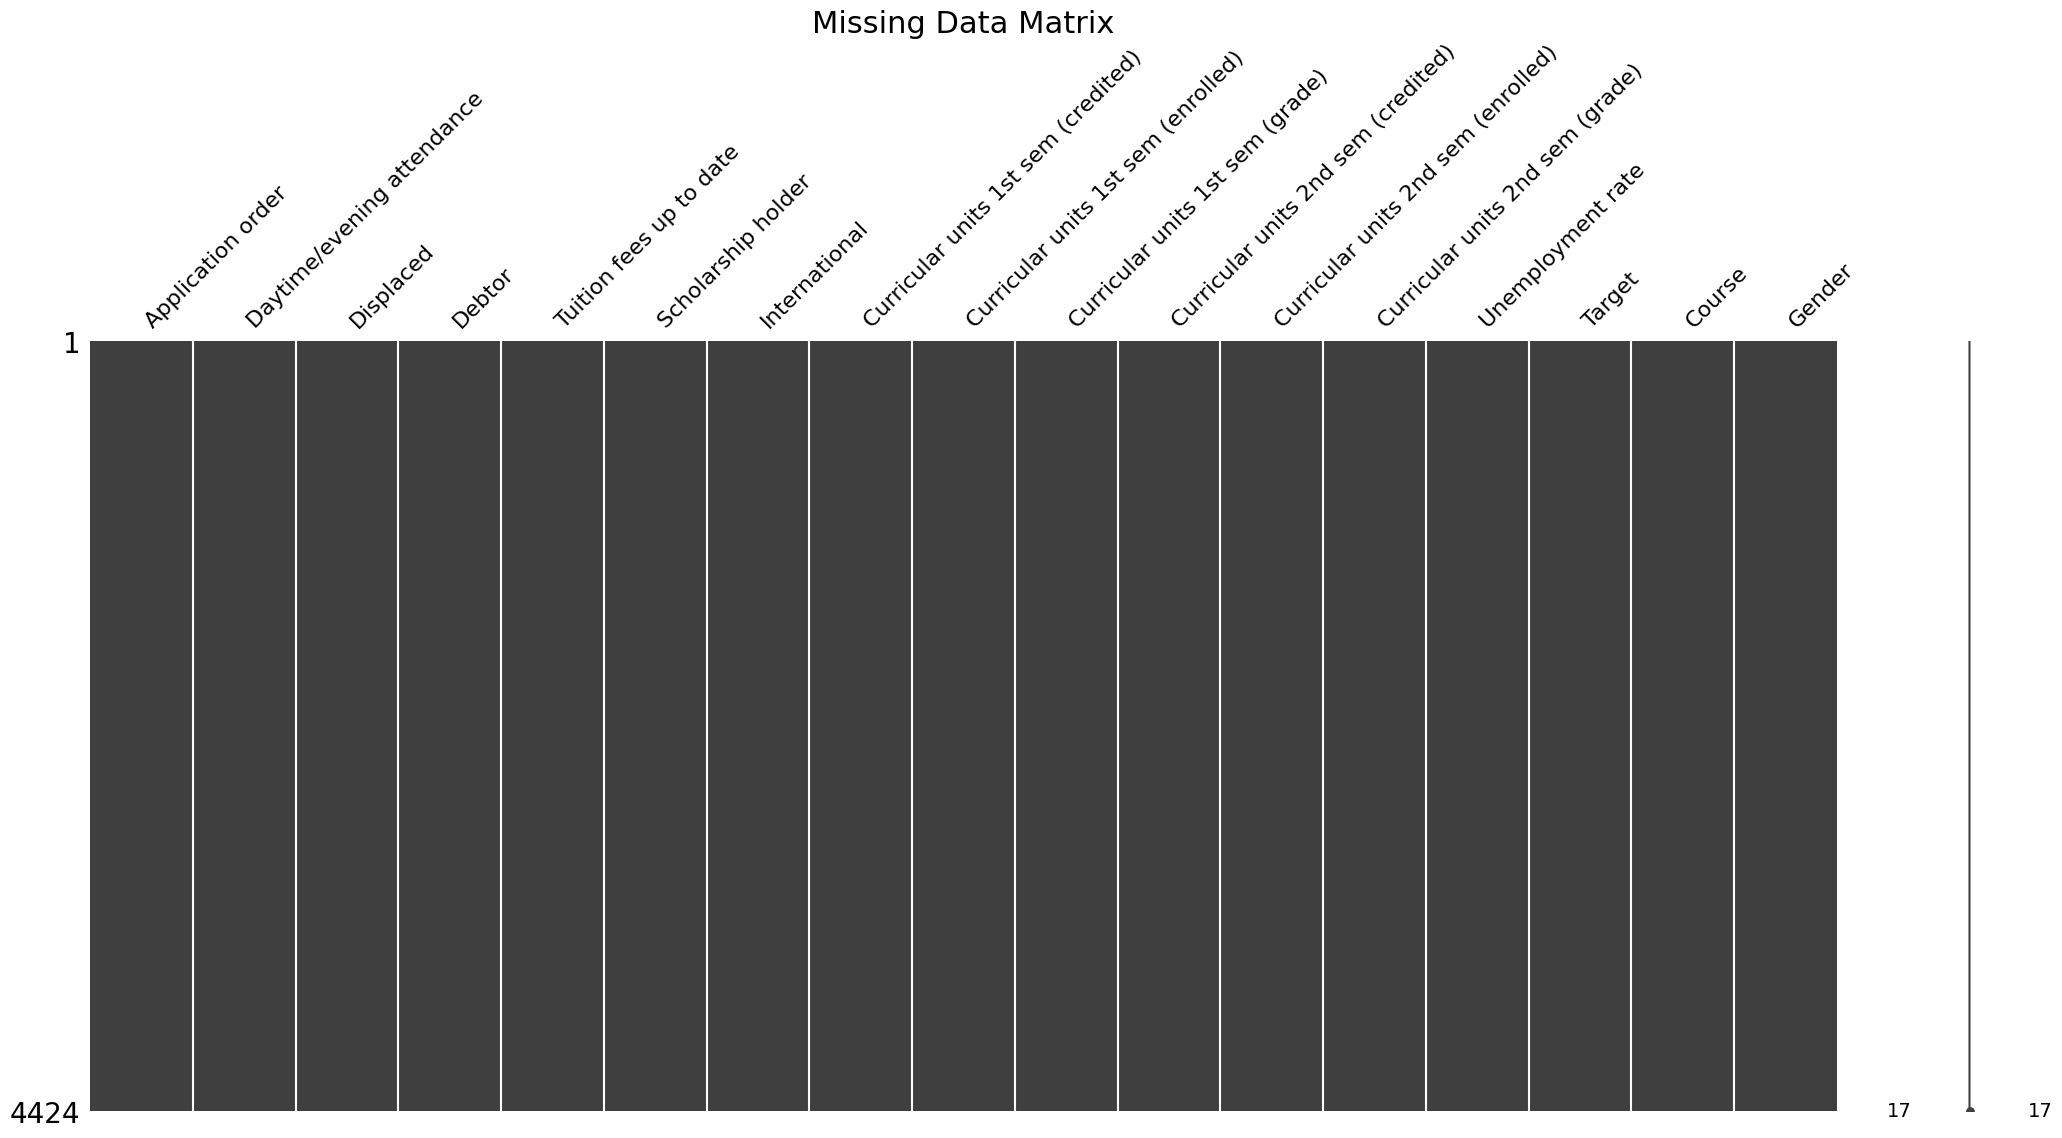

In [6]:
import missingno as mn

mn.matrix(df)
plt.title("Missing Data Matrix",fontsize=22)

## Above is the missing data matrix
You can see the dataset is complete because there are no black bars in the matrix, which would indicate a missing record. Since this dataset was downloaded from Kaggle it most likely has already been imputed or cleaned to remove missing data.

From the kaggle page there is no indication of using a seperate value for missing data, so we can assume that the dataset is complete.

### Verifying Grade Quality 

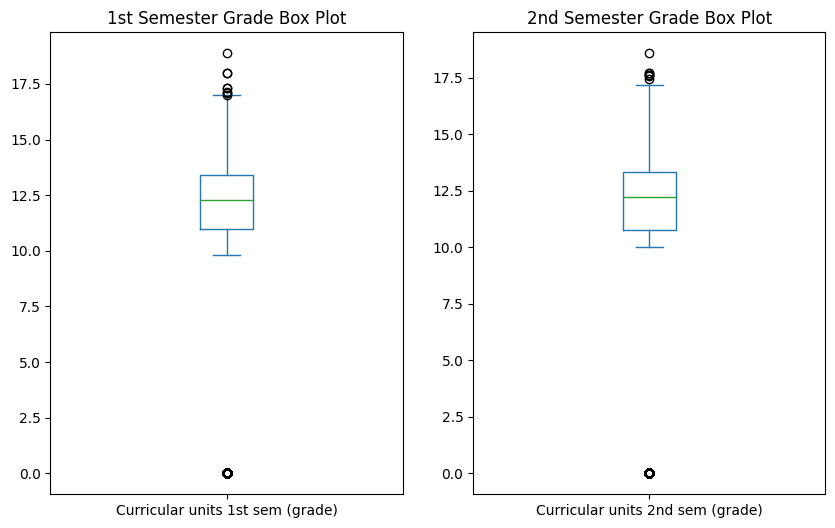

In [7]:
#Box plot of grades
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
df['Curricular units 1st sem (grade)'].plot(kind='box')
plt.title('1st Semester Grade Box Plot')

plt.subplot(1,2,2)
df['Curricular units 2nd sem (grade)'].plot(kind='box')
plt.title('2nd Semester Grade Box Plot')
plt.show()

These plots are about expected, however we can see there are some students with 0.0 grade (failing everything). Just to verify these students are real, we can check to make sure these students were actually enrolled in credits.

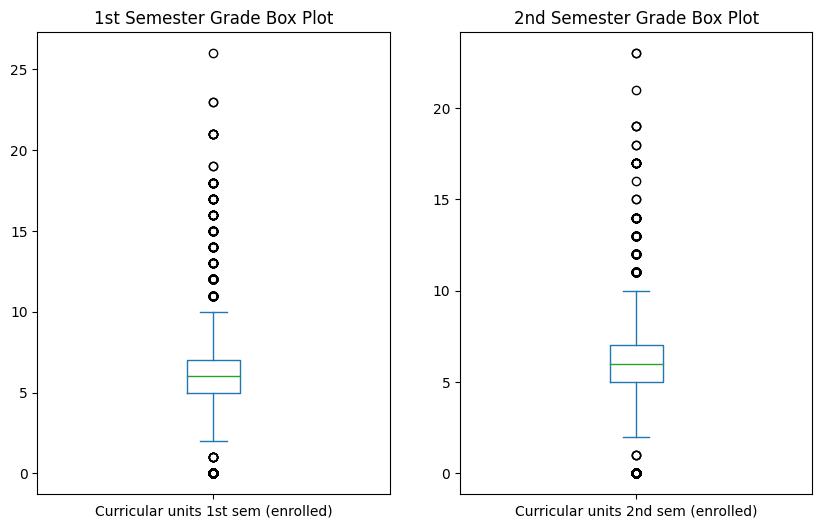

In [8]:
#Box plot of grades
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
df['Curricular units 1st sem (enrolled)'].plot(kind='box')
plt.title('1st Semester Grade Box Plot')

plt.subplot(1,2,2)
df['Curricular units 2nd sem (enrolled)'].plot(kind='box')
plt.title('2nd Semester Grade Box Plot')
plt.show()

Uh Oh! It looks like some of the data in our data set might need to be imputed, or cleaned (most likely cleaned in this case because we cannot extrapolate grades) We should not be considering students that are not enrolled in any courses, so we will remove these students from the dataset.

In [9]:
# count the number of students with 0 enrolled credits in 1st and 2nd semester
zero_enrolled_1st_sem = df[df['Curricular units 1st sem (enrolled)'] == 0].shape[0]
zero_enrolled_2nd_sem = df[df['Curricular units 2nd sem (enrolled)'] == 0].shape[0]

print(f"Number of students with 0 enrolled credits in 1st semester: {zero_enrolled_1st_sem}"
      f"\nNumber of students with 0 enrolled credits in 2nd semester: {zero_enrolled_2nd_sem}")

Number of students with 0 enrolled credits in 1st semester: 180
Number of students with 0 enrolled credits in 2nd semester: 180


It looks like these 180 records are problematic, lets split them and inspect the rest of the data, from these records

In [10]:
#create a seperate dataframe for students with 0 enrolled credits
zero_enrolled_students = df[df['Curricular units 1st sem (enrolled)'] == 0]
print(zero_enrolled_students.info())
zero_enrolled_students.head()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 4370
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application order                    180 non-null    int64  
 1   Daytime/evening attendance           180 non-null    int64  
 2   Displaced                            180 non-null    int64  
 3   Debtor                               180 non-null    int64  
 4   Tuition fees up to date              180 non-null    int64  
 5   Scholarship holder                   180 non-null    int64  
 6   International                        180 non-null    int64  
 7   Curricular units 1st sem (credited)  180 non-null    int64  
 8   Curricular units 1st sem (enrolled)  180 non-null    int64  
 9   Curricular units 1st sem (grade)     180 non-null    float64
 10  Curricular units 2nd sem (credited)  180 non-null    int64  
 11  Curricular units 2nd sem (enrolled) 

,Application order,Daytime/evening attendance,Displaced,Debtor,Tuition fees up to date,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (grade),Unemployment rate,Target,Course,Gender
0,5,1,1,0,1,0,0,0,0,0.0,0,0,0.0,10.8,Dropout,Animation and Multimedia Design,Male
20,3,1,0,0,1,1,0,0,0,0.0,0,0,0.0,11.1,Graduate,Animation and Multimedia Design,Female
59,3,1,1,0,1,0,0,0,0,0.0,0,0,0.0,7.6,Enrolled,Animation and Multimedia Design,Female
62,3,1,1,0,1,1,0,0,0,0.0,0,0,0.0,10.8,Enrolled,Animation and Multimedia Design,Male
66,3,1,1,0,1,1,0,0,0,0.0,0,0,0.0,10.8,Graduate,Animation and Multimedia Design,Male


It looks like there is class data for these records, but if they are not enrolled in any courses it will skew the grade points so it is better to just remove these records from the dataset, because we are not sure why these people have some data, but not data for credits enrolled.

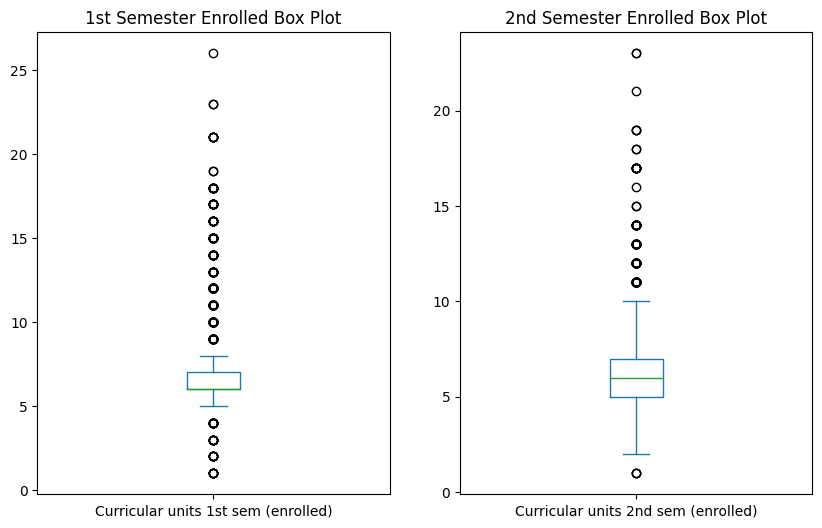

In [11]:
#remove students with 0 enrolled credits from the dataset and create a new dataframe with the cleaned data
df_cleaned = df[df['Curricular units 1st sem (enrolled)'] != 0]

#recreate the box plots for the cleaned data
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
df_cleaned['Curricular units 1st sem (enrolled)'].plot(kind='box')
plt.title('1st Semester Enrolled Box Plot')

plt.subplot(1,2,2)
df_cleaned['Curricular units 2nd sem (enrolled)'].plot(kind='box')
plt.title('2nd Semester Enrolled Box Plot')
plt.show()



Great now we can see that all of the remaining students in our dataset are actually enrolled in courses and can do further analysis using df_cleaned

# Correlation Heatmap

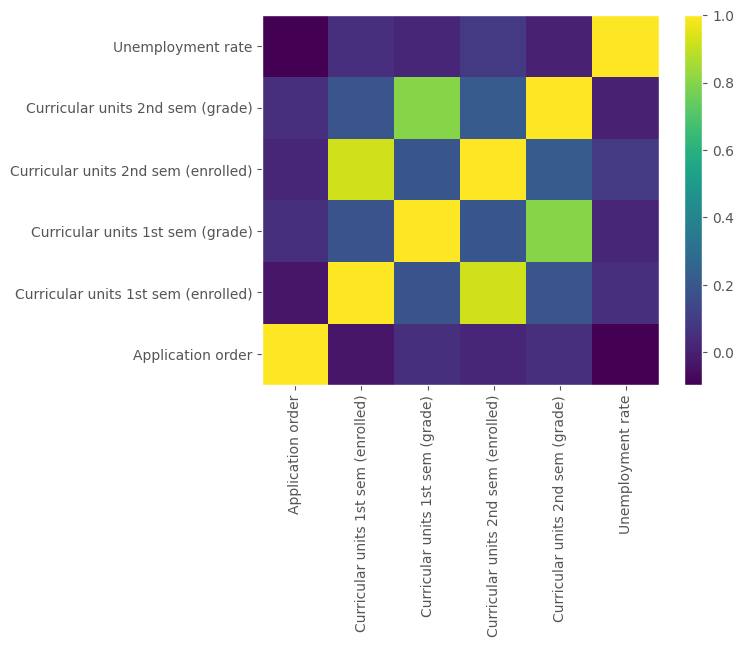

In [13]:
# plot the correlation matrix 
vars_to_use = ['Application order', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (grade)', 'Unemployment rate'] # pick vars
plt.pcolor(df_cleaned[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use, rotation='vertical')
plt.colorbar()
plt.show()

From this plot we can see that unemployment rate and application order are not very correlated with other items, but The number of units enrolled between 1st and second semester, and the grade between first and second semester are correlated. This is what we would expect because students who are willing to take more credit hours in one semester are likely to take more in the next semester. Also, students who do well in one semester are likely to do well in the next semester.

We see some correlation between number of credit hours enrolled and the grade recieved, but not as high a correlation as between the two semesters. This metric could be skewed however because naturally your grade is going to be higher with more courses taken because it is a total of the grade points for the student, so this correlation is not as significant.

## Percentage of dropouts
We started by looking what the overall percentage of drop outs are in the given data. 

In [14]:
# the percentage of individuals that droped out of school
sum(df.Target=="Dropout")/len(df)*100.0

32.120253164556964

## Gender to Dropout Ratio
Gender felt like a natural first step in trying to better understand the data set. 

In order to determine the correct amount of Females versus Males that dropped out we first needed to determine how many males and females are in the dataset.
Once we found out how many males and females are in the set we found out how many of them dropped out. At first glance they seem almost equal until We find out that there are a lot more males than females in the data set.
We use the the amount of dropouts per gender to find that almost half of males drop out and only a fourth of females drop out on average.

In [15]:
gender_map = {0: 'female', 1: 'male'}

df_grouped = df_cleaned.groupby(by='Gender')
for val,grp in df_grouped:
    print(f'There are {len(grp)} {val}s in the data set.')

There are 2789 Females in the data set.
There are 1455 Males in the data set.


In [16]:
dropout_counts = df_grouped['Target'].apply(lambda x: (x == 'Dropout').sum())

# Print the results
for val, count in dropout_counts.items():
    print(f'There are {count} {val}s that dropped out.')

There are 687 Females that dropped out.
There are 657 Males that dropped out.


In [17]:
total_counts = df_grouped.size()
for val in dropout_counts.index:
    total = total_counts[val]
    dropouts = dropout_counts[val]
    percentage = (dropouts / total) * 100
    
    print(f'There are {dropouts} {val}s that dropped out')
    print(f'This is {percentage:.2f}% of the total {val}s.\n')

There are 687 Females that dropped out
This is 24.63% of the total Females.

There are 657 Males that dropped out
This is 45.15% of the total Males.



## First Visualization using Gender 

This First Visualization compares the amount of Males that dropped out versus the number of males that gratuate or are currently enrolled. It simulatiously compares
the amount of females that dropped out versus the number of females that gratuate or are currently enrolled.

The visualization clearly shows a very large difference between male and female graduation rates. With the amount of males enrolled and graduating at a much lower rate.

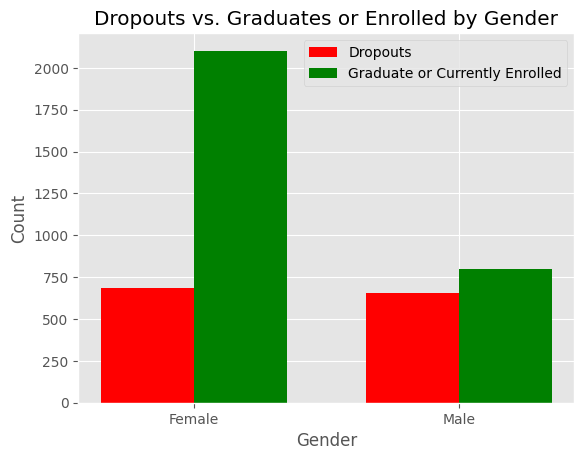

In [18]:
# Calculate the number of graduates and number of dropouts again 
graduated_counts = df_grouped['Target'].apply(lambda x: (x != 'Dropout').sum())
dropout_counts = df_grouped['Target'].apply(lambda x: (x == 'Dropout').sum())

# Create variables for the data that will be in the histogran 
labels = ['Female', 'Male']

bar_width = 0.35
index = range(len(labels))

# Plots the actual bars with red and green. Red representing dropouts 
plt.bar(index, dropout_counts, bar_width, label='Dropouts', color='red')
plt.bar([i + bar_width for i in index], graduated_counts, bar_width, label='Graduate or Currently Enrolled', color='green')

# Add labels and sizes to barchart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Dropouts vs. Graduates or Enrolled by Gender')
plt.xticks([i + bar_width / 2 for i in index], labels)  # this puts the male and female on x axis 
plt.legend()

plt.show()

## Visualization Comparing Dropouts That Were Debtors And Those On Scholarship

This Visualization compares all of the people on scholarship that dropped out to those that did not drop out, and all of the people that are in debt that dropped out to those that did not drop out.

This visulaiztion helps us better understand how financial burdens can affect drop out rates at universities as we can clearly see those that were in debt had a much higher drop out rate. 

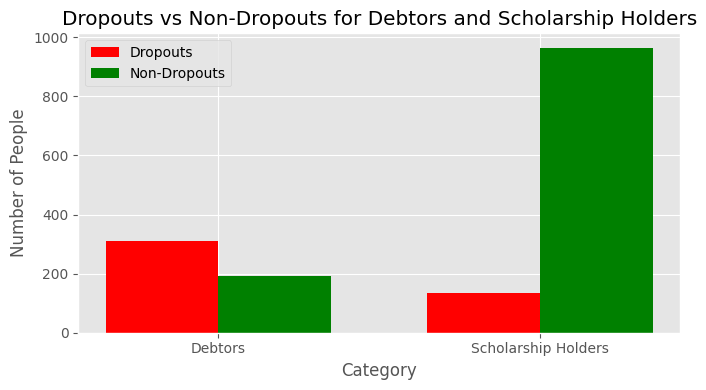

In [19]:
import matplotlib.pyplot as plt

# Filter the df for debt holders who dropped out and those that didn't 
debtors_dropout = df[(df['Debtor'] == 1) & (df['Target'] == 'Dropout')]
debtors_non_dropout = df[(df['Debtor'] == 1) & (df['Target'] != 'Dropout')]

# Filter the same way for scholarship holders
scholarship_dropout = df[(df['Scholarship holder'] == 1) & (df['Target'] == 'Dropout')]
scholarship_non_dropout = df[(df['Scholarship holder'] == 1) & (df['Target'] != 'Dropout')]

# Create variables for the data that will be in the histogran 
labels = ['Debtors', 'Scholarship Holders']
dropout_counts = [len(debtors_dropout), len(scholarship_dropout)]
non_dropout_counts = [len(debtors_non_dropout), len(scholarship_non_dropout)]

bar_width = 0.35
index = range(len(labels))
plt.figure(figsize=(7, 4))

# Plot the bars 
plt.bar(index, dropout_counts, bar_width, label='Dropouts', color='red')
plt.bar([i + bar_width for i in index], non_dropout_counts, bar_width, label='Non-Dropouts', color='green')

# Add labels
plt.title('Dropouts vs Non-Dropouts for Debtors and Scholarship Holders')
plt.xlabel('Category')
plt.ylabel('Number of People')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()

plt.tight_layout()
plt.show()



## Visulization Comparing Courses to Drop Out Rates  

This next visualization was created to have try and see if there was a specific class or classes that people took that correlated to people Dropping out. It does give us an idea of certain classes that seem to be difficult as they have a higher dropout likely hood compared to others. This includes Biofuel Production Technologies, Informatics Engineering, and Equiniculture with above a 50% drop out rate

We use two seperate visualizations of this data here, one is of the dropout %, but this graph is hard to interpret classes with little data, so we also created a stacked bar chart of the counts to show how many people are in each class, and see what portion of students graduate, vs dropout.

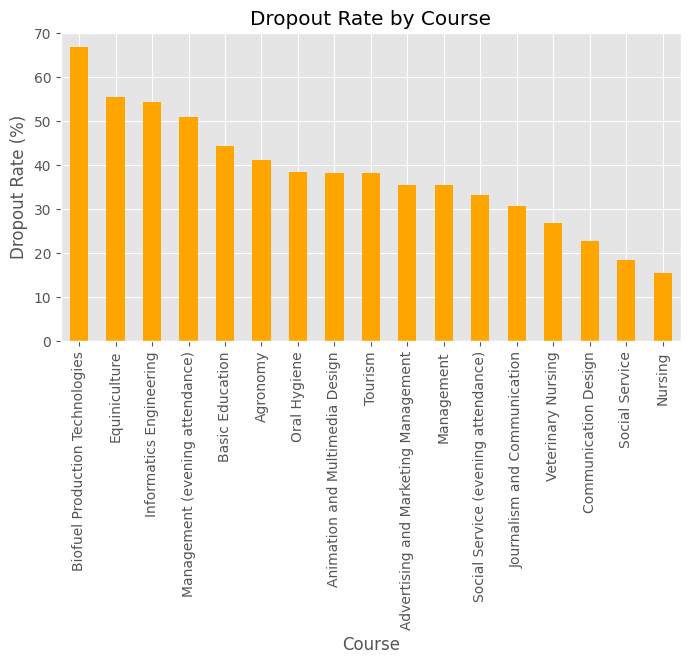

In [20]:
# First we need to group the data by Course and count the number of dropouts.
course_dropout = df[df['Target'] == 'Dropout'].groupby('Course').size()

# We also need a group that just looks at the total number of students in each course.
course_total = df.groupby('Course').size()
dropout_rate = (course_dropout / course_total) * 100

#sort by dropout rate percent
dropout_rate = dropout_rate.sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(8, 4))
dropout_rate.plot(kind='bar', color='orange')

# Add labels 
plt.title('Dropout Rate by Course')
plt.xlabel('Course')
plt.ylabel('Dropout Rate (%)')
plt.show()

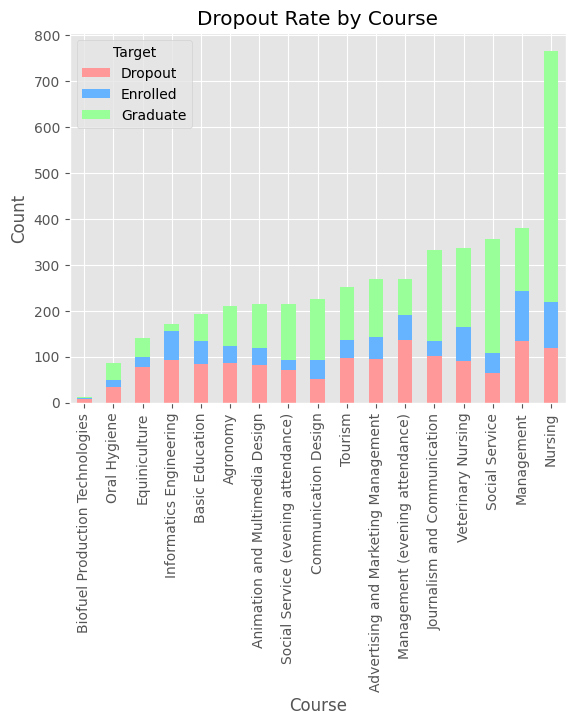

In [21]:
# Drop out rate is the column 'Target' which is either "Dropout" or "Graduate"

# Create a crosstab to count Dropouts and Graduates by Gender
dropout_rate = pd.crosstab(df['Course'], df['Target'])

#sort courses by total count of students
dropout_rate = dropout_rate.reindex(dropout_rate.sum(axis=1).sort_values().index)

# Create the stacked bar chart
dropout_rate.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Dropout Rate by Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()

## Plots that look at first semester grades compared to if someone dropped out

The below plots are interesting as they show that students that drop out do have lower overall grades but they aren't substantially lower than those that graduate or those that are currently enrolled.
You can also clearly see that there are some substantial outliers pulling the average down quite a bit. This made us wonder why some of the higher achieving students may drop out which we will explore in the next visualization.

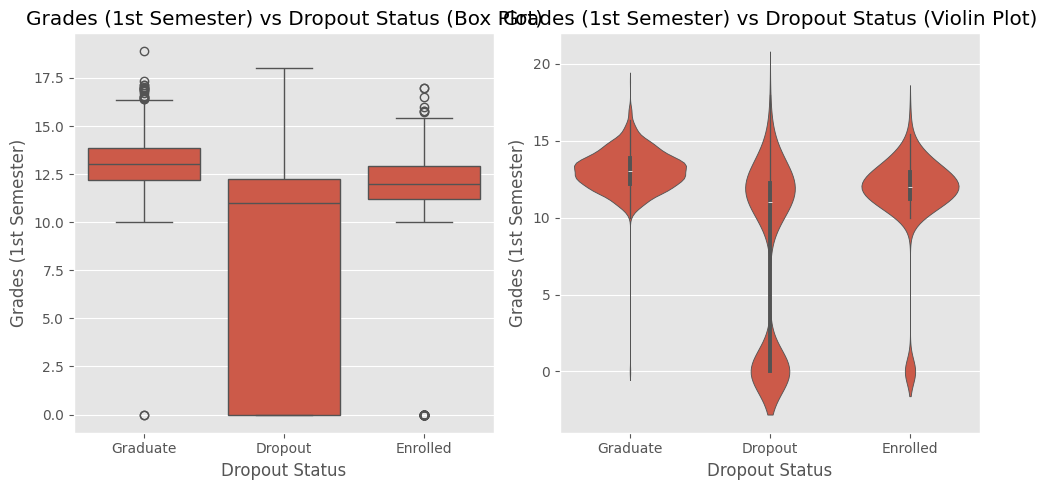

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots so they can be visualized side by side 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  

# Box plot on the left side 
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df_cleaned, ax=axes[0])
axes[0].set_title('Grades (1st Semester) vs Dropout Status (Box Plot)')
axes[0].set_xlabel('Dropout Status')
axes[0].set_ylabel('Grades (1st Semester)')

# Violin plot using the same data 
sns.violinplot(x='Target', y='Curricular units 1st sem (grade)', data=df_cleaned, ax=axes[1])
axes[1].set_title('Grades (1st Semester) vs Dropout Status (Violin Plot)')
axes[1].set_xlabel('Dropout Status')
axes[1].set_ylabel('Grades (1st Semester)')

plt.tight_layout()
plt.show()


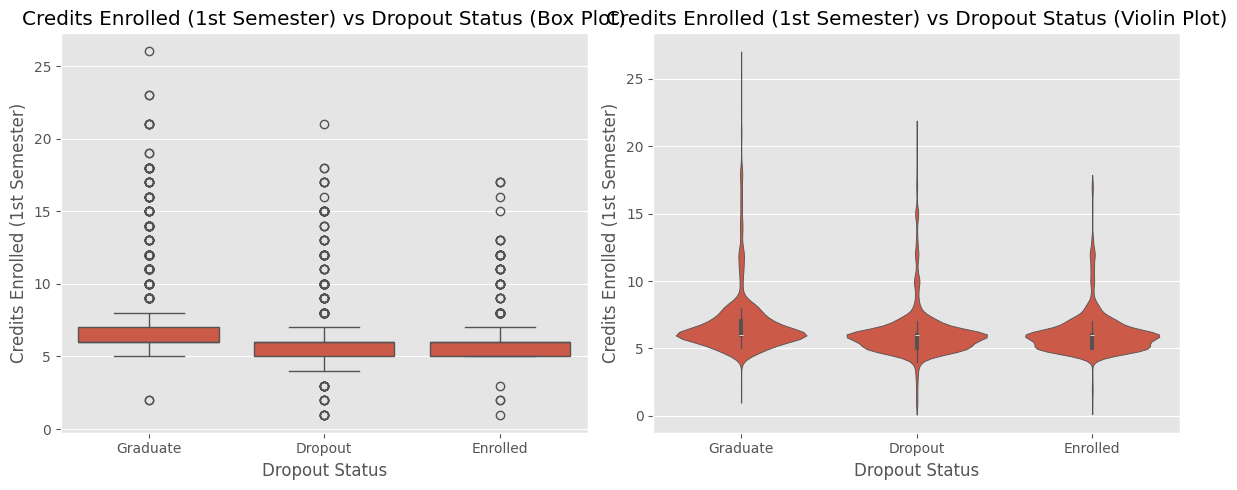

In [23]:
# Create a figure with two subplots so they can be visualized side by side 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Box plot on the left side 
sns.boxplot(x='Target', y='Curricular units 1st sem (enrolled)', data=df_cleaned, ax=axes[0])
axes[0].set_title('Credits Enrolled (1st Semester) vs Dropout Status (Box Plot)')
axes[0].set_xlabel('Dropout Status')
axes[0].set_ylabel('Credits Enrolled (1st Semester)')

# Violin plot using the same data 
sns.violinplot(x='Target', y='Curricular units 1st sem (enrolled)', data=df_cleaned, ax=axes[1])
axes[1].set_title('Credits Enrolled (1st Semester) vs Dropout Status (Violin Plot)')
axes[1].set_xlabel('Dropout Status')
axes[1].set_ylabel('Credits Enrolled (1st Semester)')

plt.tight_layout()
plt.show()

# Interesting Question 1: How does Gender impact the dropout rate by course?

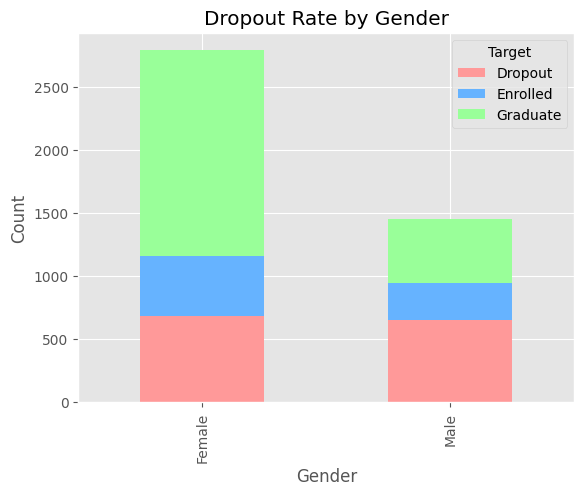

In [24]:
# Drop out rate is the column 'Target' which is either "Dropout" or "Graduate"

# Create a crosstab to count Dropouts and Graduates by Gender
dropout_rate = pd.crosstab(df_cleaned['Gender'], df_cleaned['Target'])

# Create the stacked bar chart
dropout_rate.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Dropout Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


As we can see from this graph, the proportion of dropouts in the men group is much higher with respect to the graduated students and enrolled students, compared to women. This is interesting because it shows that men are more likely to drop out of the program.

# Further inspection: We can also look at the dropout rate/ gender releative to courses

To do this we took the Dropout Rate by Course graph from before and added gender data into it.

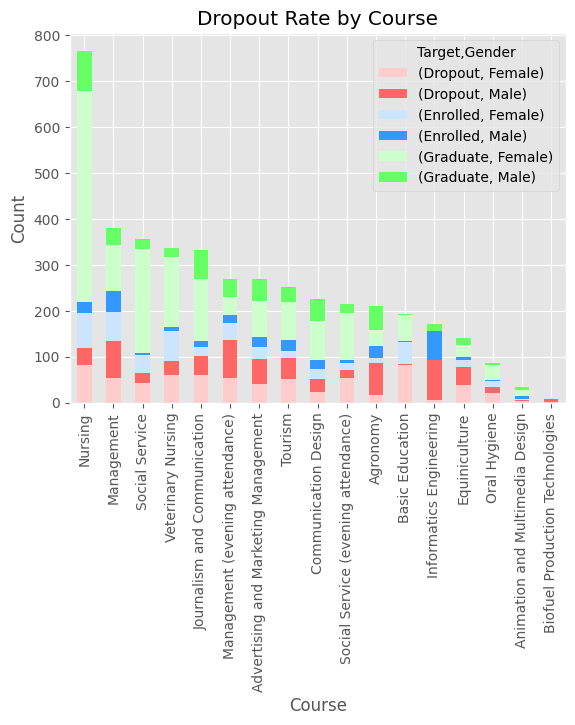

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

# Create a crosstab to count Dropouts and Graduates by Course and Gender
dropout_rate_by_course_and_gender = pd.crosstab([df_cleaned['Course'], df_cleaned['Gender']], df_cleaned['Target'])

# Sum Dropouts and Graduates by Course only (ignoring Gender for sorting)
dropout_rate_by_course = dropout_rate_by_course_and_gender.groupby(level='Course').sum().sum(axis=1)

# Sort courses based on total number of students (Dropout + Graduate)
sorted_courses = dropout_rate_by_course.sort_values(ascending=False).index

# Reindex the crosstab to match the sorted course order
dropout_rate_by_course_and_gender_sorted = dropout_rate_by_course_and_gender.reindex(sorted_courses, level='Course')

# Plot stacked bar chart
colors = ['#ffcccc', '#ff6666', '#cce5ff', '#3399ff', '#ccffcc', '#66ff66']  # Light and dark shades for female, male
dropout_rate_by_course_and_gender_sorted.unstack().plot(kind='bar', stacked=True, color=colors)

plt.title('Dropout Rate by Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()
 

From this distribution we can clearly see that some courses are less likely to be dropped than other courses. For example Nursing is less likely to be dropped than Informatics Engineering. However Nursing is a heavily female course, and Informatics Engineering is a heavily male dominated course, so we would expect nursing to have relatively less dropouts than informatics because men are more likely to drop courses in general.

## Interesting Question 2: How Do External Factors Like Debt or Displacement Affect High Achieving Students Who Drop Out?  

### Visualization of High Achieving drop out students and whether they are Debtors or Displaced

The graph explores how external factors such as debt and displacement impact students with above average grades who still drop out. It shows that a significant majority (over two-thirds) of high-achieving dropouts are either in debt, displaced, or both. This suggests that even academically successful students can be significantly affected by external pressures, leading them to drop out despite their strong academic performance. This highlights the important role that financial and personal stability plays in student retention, even for those performing well academically.

In the below visualization you will see we used the number 13 as the threshold for defining high achieving students because this dataset is focused on Portuguese students. A grade of 13 or higher places students in the top 50th percentile of academic performance based on our previous grade box plot, making it a effect benchmark what a above average student's grades. By focusing on students with grades above 13, we can better understand how external factors like debt or displacement affect those who are academically strong but still vulnerable to dropping out due to non academic challenges.

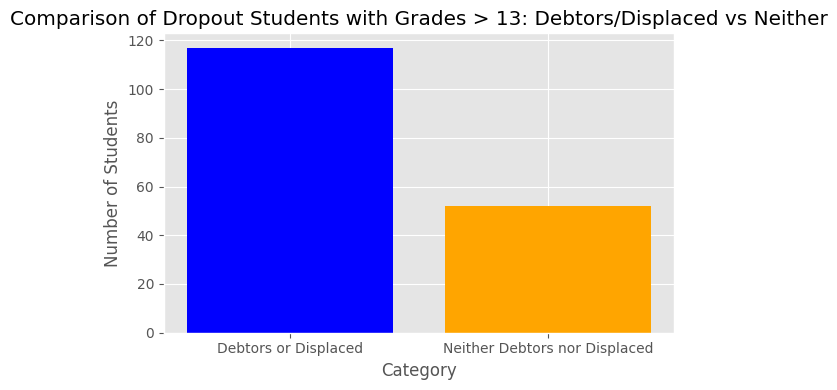

In [26]:
import matplotlib.pyplot as plt

# Filter students who dropped out and have 1st semester grades higher than 13
df_dropout_high_grades = df_cleaned[(df_cleaned['Target'] == 'Dropout') & (df_cleaned['Curricular units 1st sem (grade)'] > 13)]

# First Group: Students who are either debtors or displaced
debtors_or_displaced_count = df_dropout_high_grades[(df_dropout_high_grades['Debtor'] == 1) | 
                                                    (df_dropout_high_grades['Displaced'] == 1)].shape[0]

# Second Group: Students who are neither debtors nor displaced
neither_debtors_nor_displaced_count = df_dropout_high_grades[(df_dropout_high_grades['Debtor'] == 0) & 
                                                             (df_dropout_high_grades['Displaced'] == 0)].shape[0]

labels = ['Debtors or Displaced', 'Neither Debtors nor Displaced']
counts = [debtors_or_displaced_count, neither_debtors_nor_displaced_count]
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['blue', 'orange'])

plt.title('Comparison of Dropout Students with Grades > 13: Debtors/Displaced vs Neither')
plt.ylabel('Number of Students')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

## Interesting Question 3: How Does Taking Night Classes Effect The Dropout Rate Of Students

### Visualization of Day vs Night Time Students and Drop Out Rate

The graphs show the relationship between day vs. night classes and dropout rates. The first chart highlights that more students who attend day classes drop out compared to those attending night classes. However, this data could be misleading since it doesn't consider the total number of students enrolled in each type of class. The second and third graphs provide a better perspective by comparing the dropout status graduate, dropout, or still enrolled among night and day students. These show that while the absolute number of dropouts is higher for day students, the proportion of night class dropouts is relatively small, with most night students either graduating or remaining enrolled. When looking at the day and night plots it shows that while most students that drop out take day class the actual percentage of those that drop out is higher for students that go to night class. 


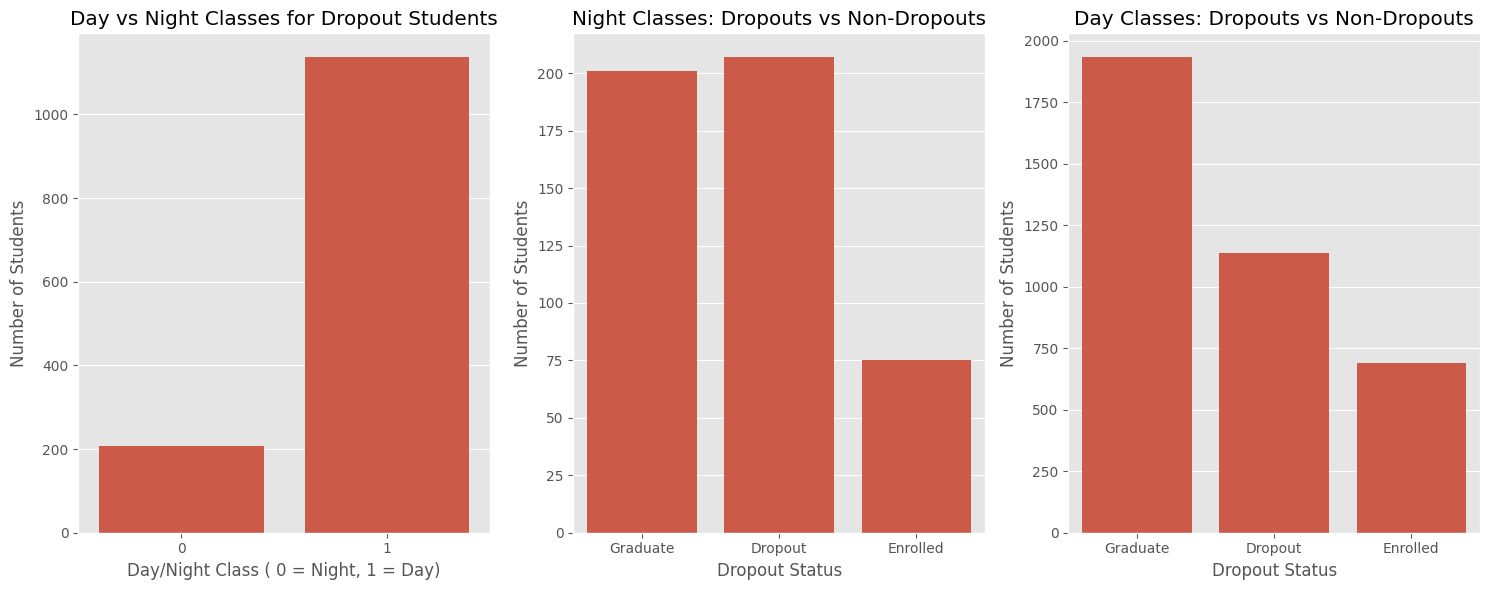

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for students who dropped out
df_dropout = df_cleaned[df_cleaned['Target'] == 'Dropout']
df_not_dropout = df_cleaned[df_cleaned['Target'] != 'Dropout']
df_night_classes = df_cleaned[df_cleaned['Daytime/evening attendance'] == 0]
df_day_classes = df_cleaned[df_cleaned['Daytime/evening attendance'] == 1]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Add labels and title
sns.countplot(x='Daytime/evening attendance', data=df_dropout, ax=axes[0])
axes[0].set_title('Day vs Night Classes for Dropout Students')
axes[0].set_xlabel('Day/Night Class ( 0 = Night, 1 = Day)')
axes[0].set_ylabel('Number of Students')

# Add labels and title
sns.countplot(x='Target', data=df_night_classes, ax=axes[1])
axes[1].set_title('Night Classes: Dropouts vs Non-Dropouts')
axes[1].set_xlabel('Dropout Status')
axes[1].set_ylabel('Number of Students')

sns.countplot(x='Target', data=df_day_classes, ax=axes[2])
axes[2].set_title('Day Classes: Dropouts vs Non-Dropouts')
axes[2].set_xlabel('Dropout Status')
axes[2].set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

## Interesting Question 4 (Exceptional Work): How does the number of credits enrolled in the first semester impact the dropout rate?

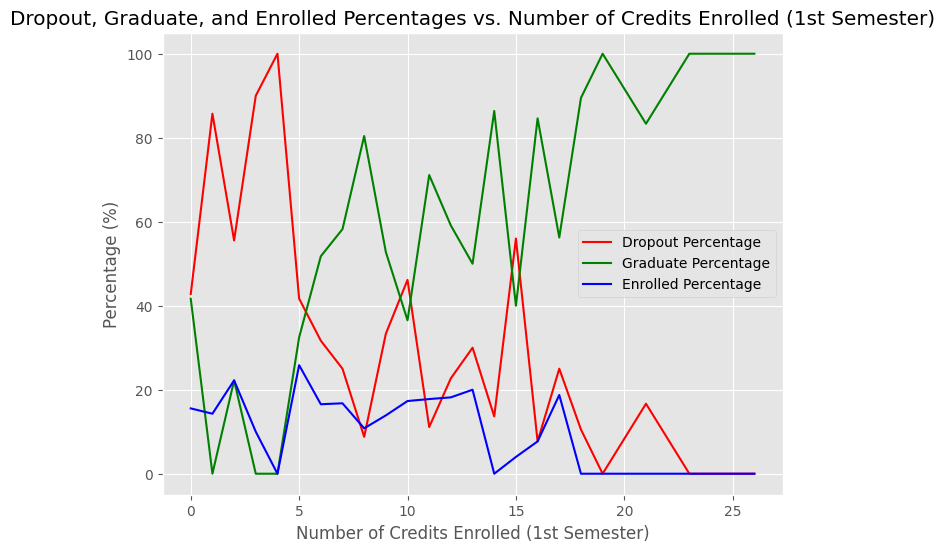

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by the number of credits enrolled and calculate the number of dropouts, graduates, and enrolled
df_grouped = df.groupby('Curricular units 1st sem (enrolled)').agg(
    total_students=('Target', 'size'),
    dropouts=('Target', lambda x: (x == 'Dropout').sum()),
    graduated=('Target', lambda x: (x == 'Graduate').sum()),  # Assuming 'Graduate' is the label for graduates
    enrolled=('Target', lambda x: (x == 'Enrolled').sum())  # Assuming 'Enrolled' is the label for currently enrolled students
).reset_index()

# Calculate percentages
df_grouped['dropout_percentage'] = (df_grouped['dropouts'] / df_grouped['total_students']) * 100
df_grouped['graduate_percentage'] = (df_grouped['graduated'] / df_grouped['total_students']) * 100
df_grouped['enrolled_percentage'] = (df_grouped['enrolled'] / df_grouped['total_students']) * 100

# Plot the line chart
plt.figure(figsize=(8, 6))

# Dropout percentage line
plt.plot(df_grouped['Curricular units 1st sem (enrolled)'], df_grouped['dropout_percentage'], linestyle='-', color='red', label='Dropout Percentage')

# Graduate percentage line
plt.plot(df_grouped['Curricular units 1st sem (enrolled)'], df_grouped['graduate_percentage'], linestyle='-', color='green', label='Graduate Percentage')

# Enrolled percentage line
plt.plot(df_grouped['Curricular units 1st sem (enrolled)'], df_grouped['enrolled_percentage'], linestyle='-', color='blue', label='Enrolled Percentage')

# Add labels and title
plt.title('Dropout, Graduate, and Enrolled Percentages vs. Number of Credits Enrolled (1st Semester)')
plt.xlabel('Number of Credits Enrolled (1st Semester)')
plt.ylabel('Percentage (%)')

# Show legend
plt.legend()

# Show the plot
plt.show()


From this graph we can clearly see that there is a correlation between the number of credits enrolled and your likelihood to graduate. At some of the highest values everyone graduated. However this does not necesarily mean that enrolling in more credits causes you to graduate. Many schools actually limit the top of the range of credits to students they feel can handle the workload, this could explain why the very top(26 credit hours enrolled) has a 100% graduation rate) But there is also only 1 person in this range. This is a common thing how correlation does not equal causation.